### Data Dictionary

In this problem, we will use a processed version of the Cleveland Dataset to predict the onset of a heart disease. In this dataset, each row represents a patient with his/her attributes and a binary indicator for whether or not they had a heart disease. We will attempt to understand the factors that can cause a heart disease.

Here is a detailed description of the variables:

- Age: Age in years
- Sex: 1 if male, 0 if female
- ChestPain: Chest pain type (discrete values 1-4)
- RestBP: Resting blood pressure 

- Chol: Cholestoral
- FBS: 1 if fasting blood sugar > 120 mg/dl, 0 otherwise
- RestECG: Resting electrocardiographic (discrete values 0-2)
- Thalach: Maximum heart rate achieved
- MajorVessels: Number of major vessels (discrete values 0-3)
- HD:1 if there was a heart disease, 0 otherwise

In this problem, we will use various classification methods to try to predict the onset of a heart disease.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("data_hd.csv")

In [3]:
df

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0
...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,0,1
293,45,1,1,110,264,0,0,132,0,1
294,68,1,4,144,193,1,0,141,2,1
295,57,1,4,130,131,0,0,115,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           297 non-null    int64
 1   Sex           297 non-null    int64
 2   ChestPain     297 non-null    int64
 3   RestBP        297 non-null    int64
 4   Chol          297 non-null    int64
 5   FBS           297 non-null    int64
 6   RestECG       297 non-null    int64
 7   Thalach       297 non-null    int64
 8   MajorVessels  297 non-null    int64
 9   HD            297 non-null    int64
dtypes: int64(10)
memory usage: 23.3 KB


In [5]:
df.describe(include='all')

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.676768,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.938965,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,3.000000,1.000000


In [6]:
df.shape

(297, 10)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'FBS', 'RestECG',
       'Thalach', 'MajorVessels', 'HD'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

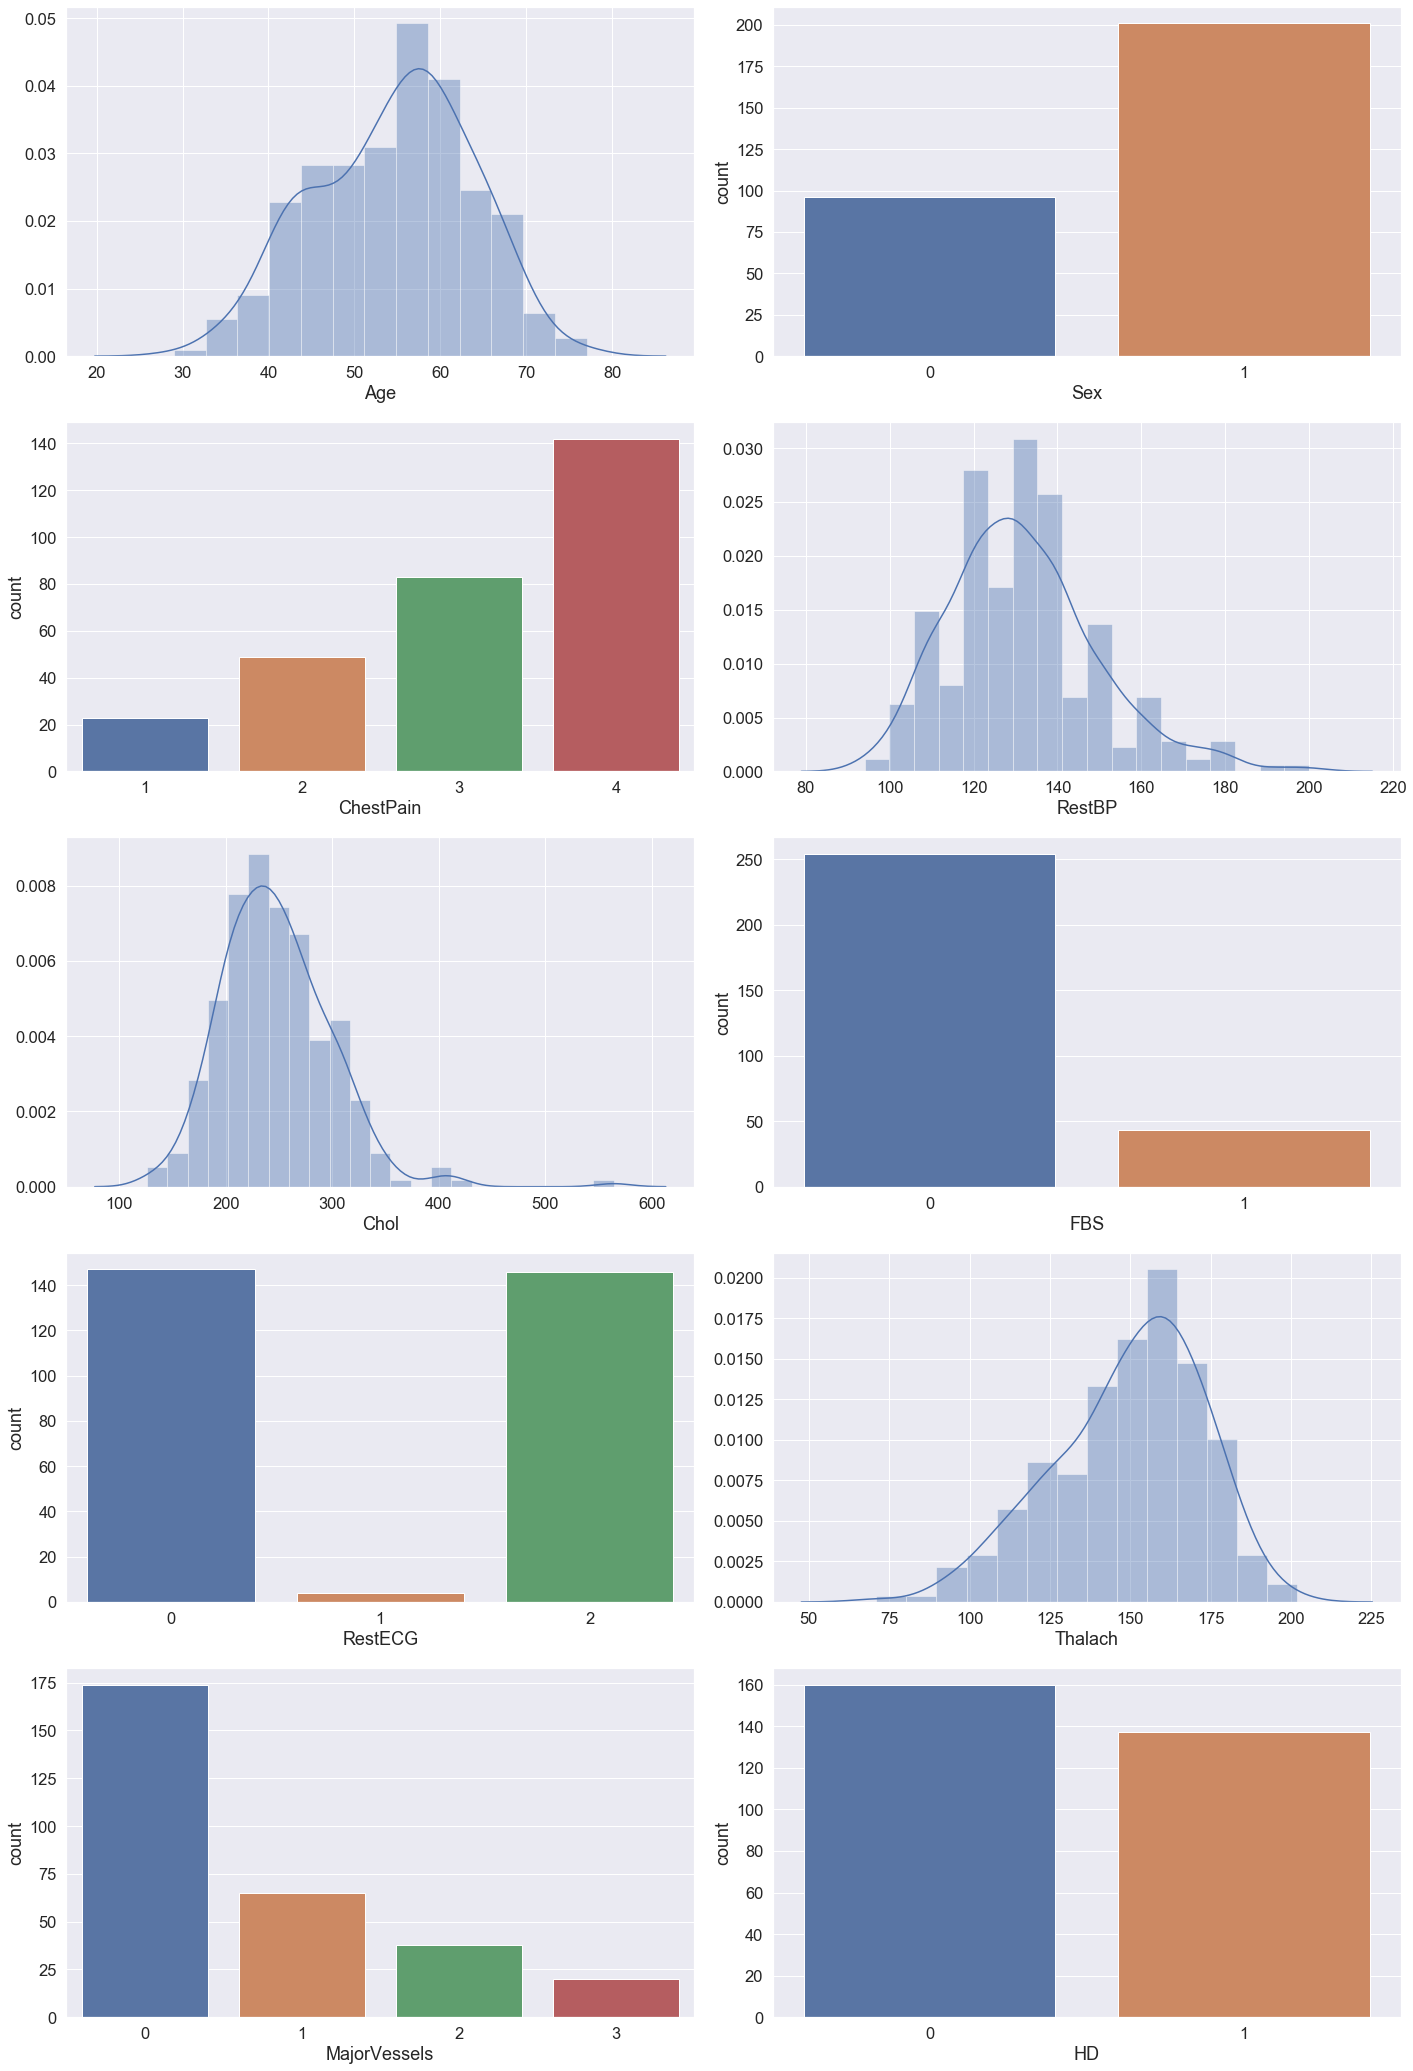

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.Age)
plt.subplot(7,2,2)
sns.countplot(df.Sex)
plt.subplot(7,2,3)
sns.countplot(df.ChestPain)
plt.subplot(7,2,4)
sns.distplot(df.RestBP)
plt.subplot(7,2,5)
sns.distplot(df.Chol)
plt.subplot(7,2,6)
sns.countplot(df.FBS)
plt.subplot(7,2,7)
sns.countplot(df.RestECG)
plt.subplot(7,2,8)
sns.distplot(df.Thalach)
plt.subplot(7,2,9)
sns.countplot(df.MajorVessels)
plt.subplot(7,2,10)
sns.countplot(df.HD)
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

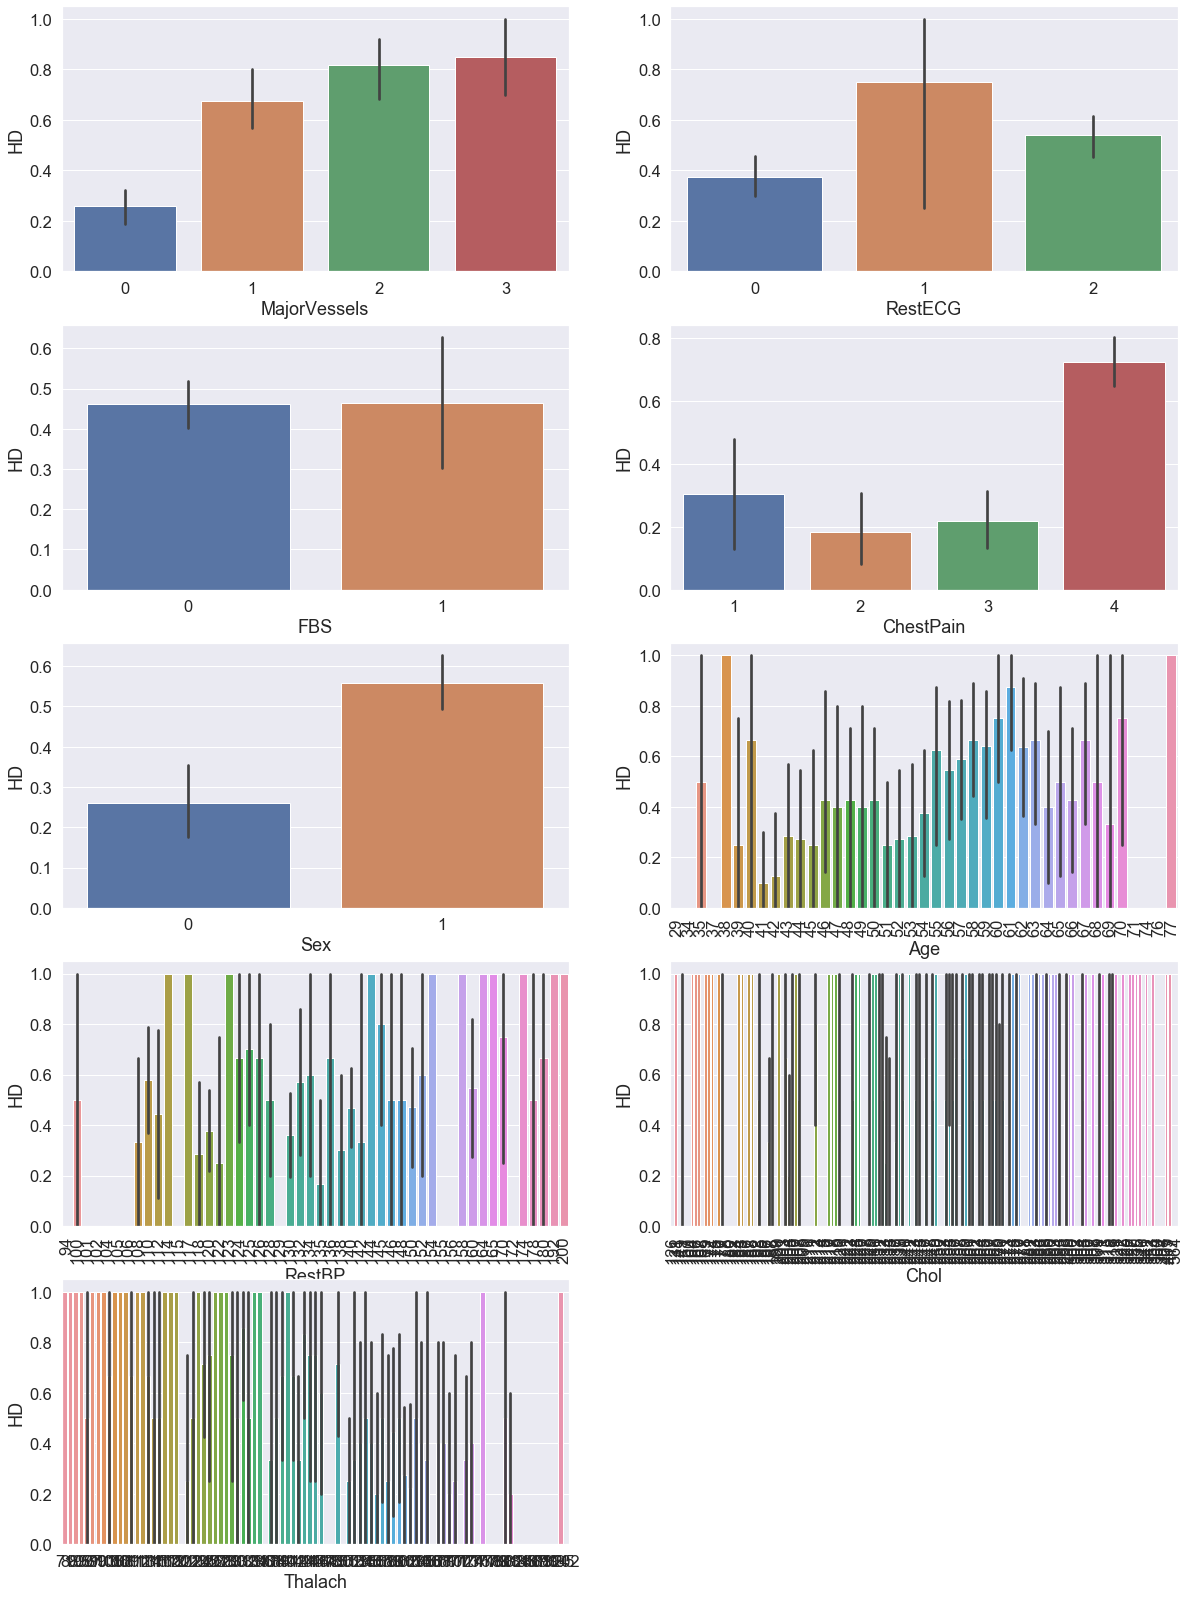

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.barplot(x='MajorVessels', y='HD',data=df)
plt.subplot(7,2,2)
sns.barplot(x='RestECG', y='HD',data=df)
plt.subplot(7,2,3)
sns.barplot(x='FBS', y='HD',data=df)
plt.subplot(7,2,4)
sns.barplot(x='ChestPain', y='HD',data=df)
plt.subplot(7,2,5)
sns.barplot(x='Sex', y='HD',data=df)
plt.subplot(7,2,6)
plt.xticks(rotation=90)
sns.barplot(x='Age', y='HD',data=df)
plt.subplot(7,2,7)
plt.xticks(rotation=90)
sns.barplot(x='RestBP', y='HD',data=df)
plt.subplot(7,2,8)
plt.xticks(rotation=90)
sns.barplot(x='Chol', y='HD',data=df)
plt.subplot(7,2,9)
sns.barplot(x='Thalach', y='HD',data=df)



plt.show()

In [10]:
df.corr()

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
Age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.362210,0.227075
Sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.091925,0.278467
ChestPain,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.235644,0.408945
RestBP,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.097954,0.153490
Chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.115945,0.080285
FBS,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,0.152086,0.003167
RestECG,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.129021,0.166343
Thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.268727,-0.423817
MajorVessels,0.362210,0.091925,0.235644,0.097954,0.115945,0.152086,0.129021,-0.268727,1.000000,0.463189
HD,0.227075,0.278467,0.408945,0.153490,0.080285,0.003167,0.166343,-0.423817,0.463189,1.000000


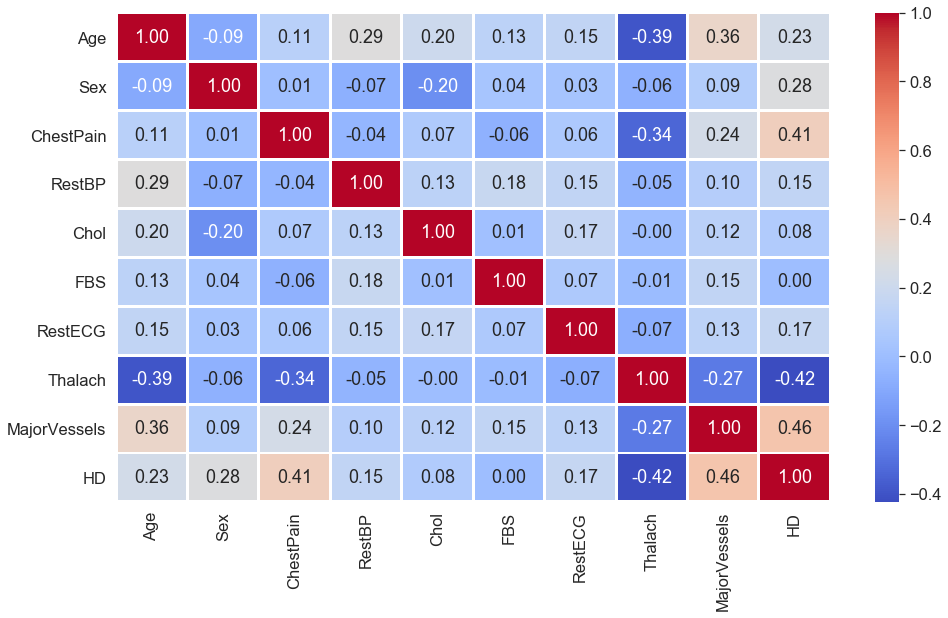

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

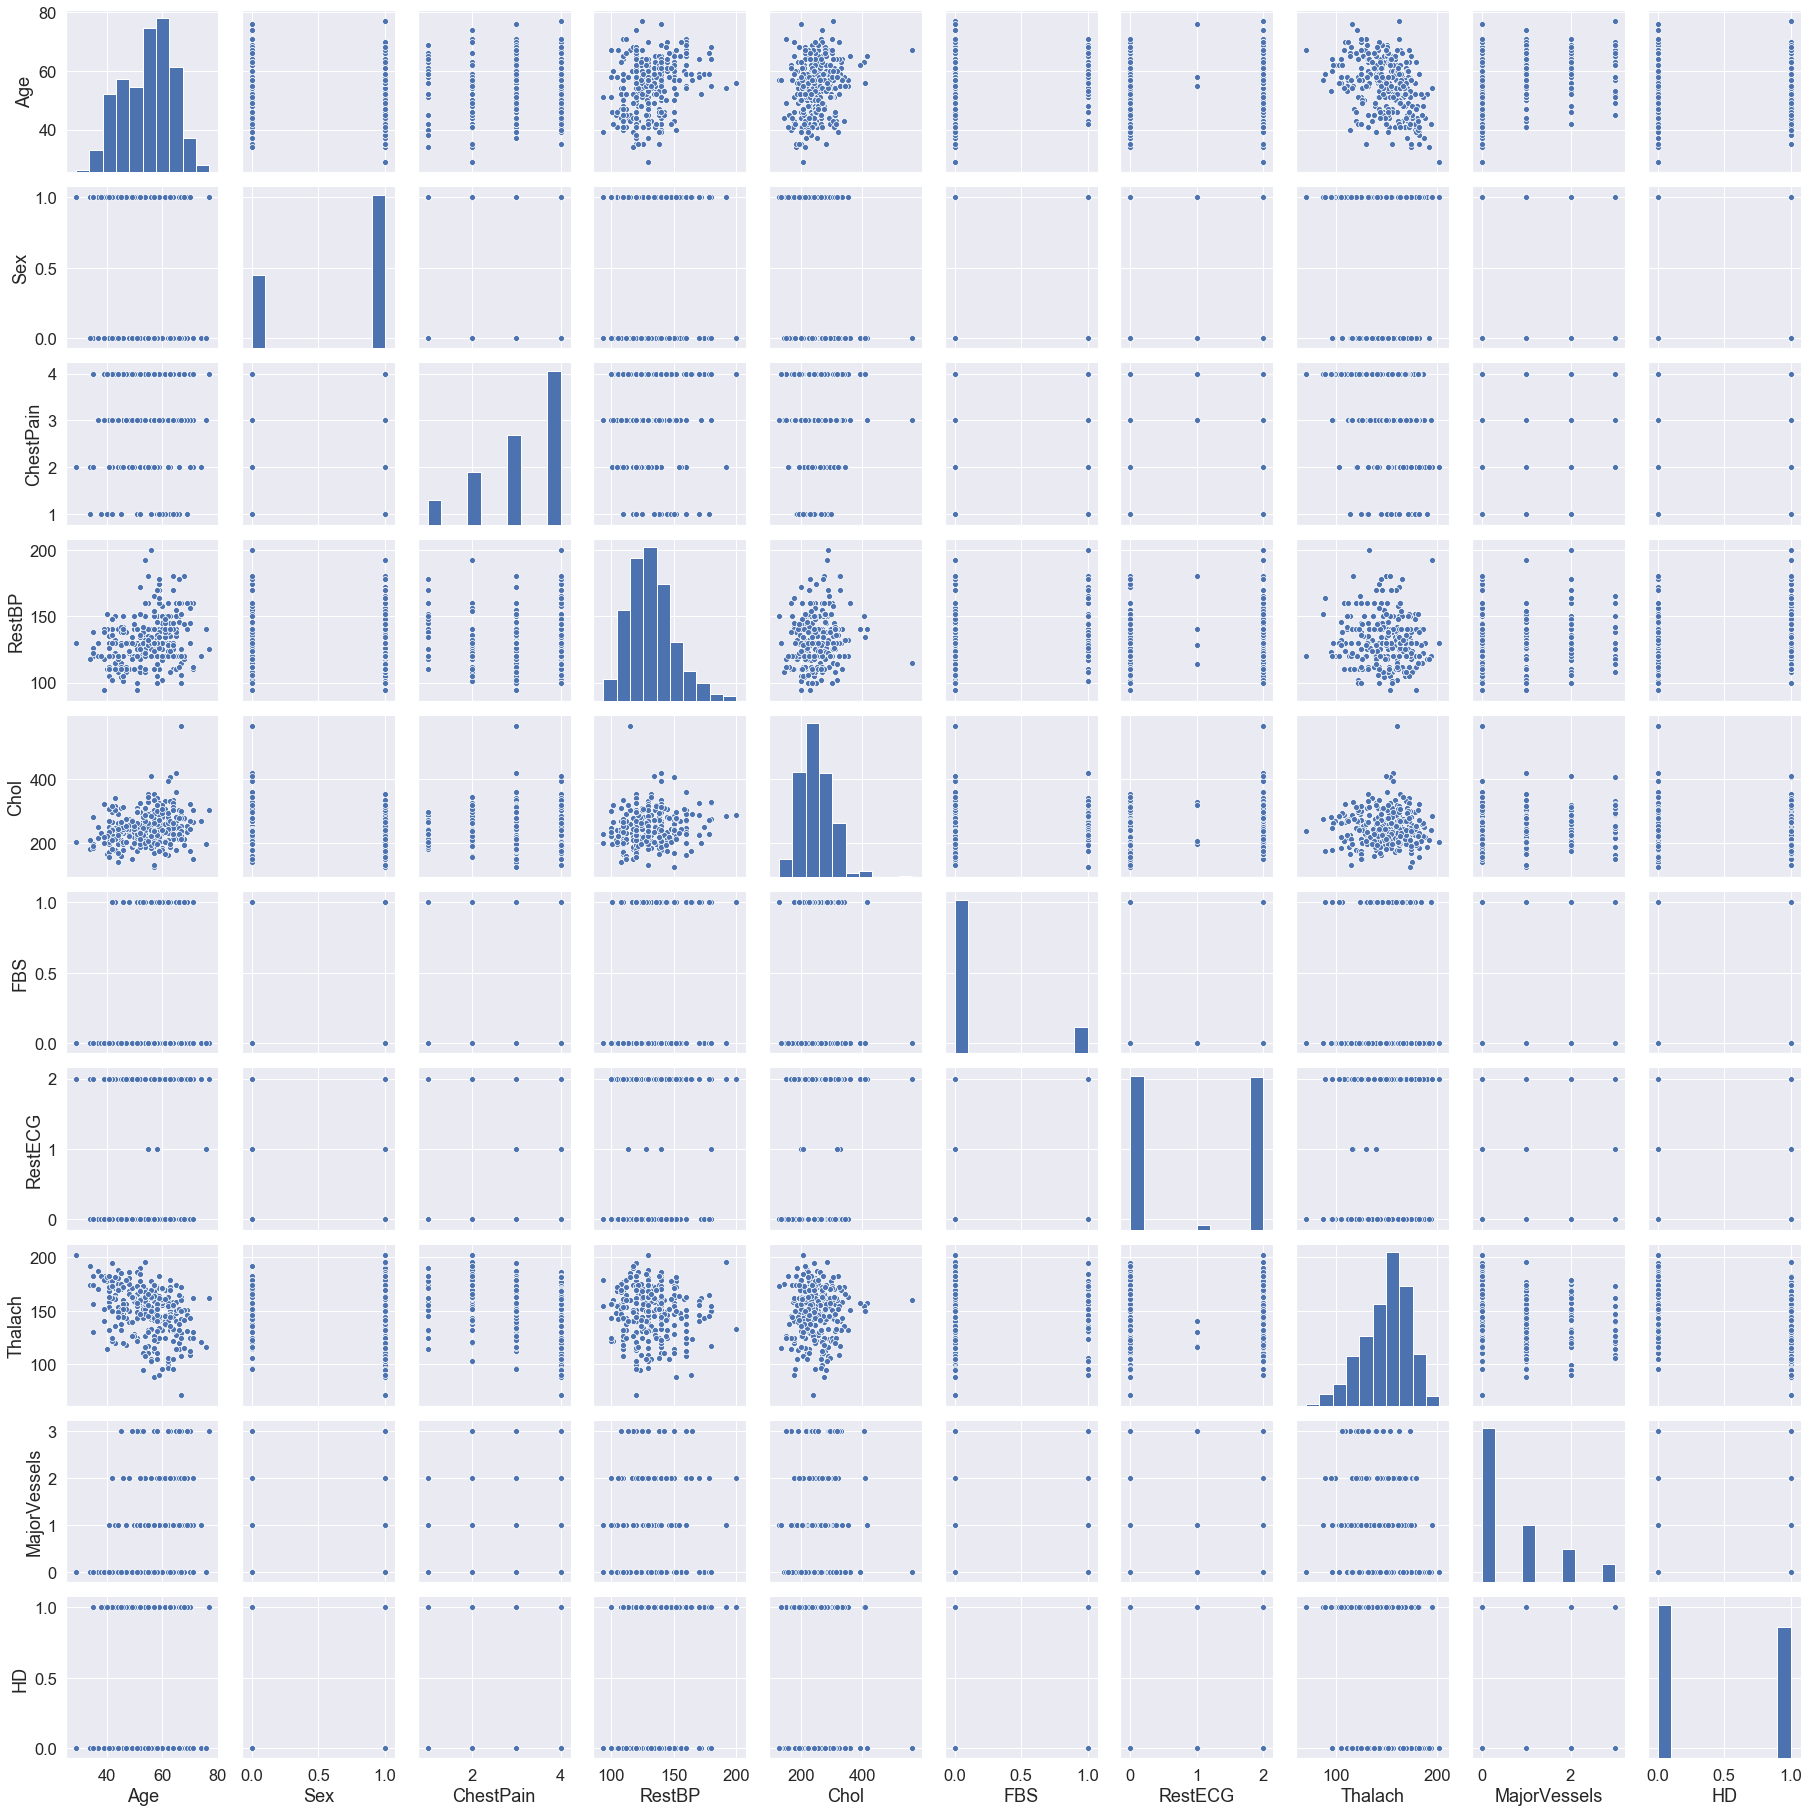

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

Age             0
Sex             0
ChestPain       0
RestBP          0
Chol            0
FBS             0
RestECG         0
Thalach         0
MajorVessels    0
HD              0
dtype: int64

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

In [15]:
df['HD'].value_counts()

0    160
1    137
Name: HD, dtype: int64

### Treat Outliers

In [16]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'FBS', 'RestECG',
       'Thalach', 'MajorVessels', 'HD'],
      dtype='object')

In [17]:
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.676768,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.938965,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,3.000000,1.000000


### Treat Data Types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           297 non-null    int64
 1   Sex           297 non-null    int64
 2   ChestPain     297 non-null    int64
 3   RestBP        297 non-null    int64
 4   Chol          297 non-null    int64
 5   FBS           297 non-null    int64
 6   RestECG       297 non-null    int64
 7   Thalach       297 non-null    int64
 8   MajorVessels  297 non-null    int64
 9   HD            297 non-null    int64
dtypes: int64(10)
memory usage: 23.3 KB


In [19]:
df[['ChestPain','RestECG','MajorVessels']] = df[['ChestPain','RestECG','MajorVessels']].astype('object')

In [20]:
df

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0
...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,0,1
293,45,1,1,110,264,0,0,132,0,1
294,68,1,4,144,193,1,0,141,2,1
295,57,1,4,130,131,0,0,115,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           297 non-null    int64 
 1   Sex           297 non-null    int64 
 2   ChestPain     297 non-null    object
 3   RestBP        297 non-null    int64 
 4   Chol          297 non-null    int64 
 5   FBS           297 non-null    int64 
 6   RestECG       297 non-null    object
 7   Thalach       297 non-null    int64 
 8   MajorVessels  297 non-null    object
 9   HD            297 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 23.3+ KB


In [22]:
df2 = pd.get_dummies(df,drop_first=True)

In [23]:
df2

,Age,Sex,RestBP,Chol,FBS,Thalach,HD,ChestPain_2,ChestPain_3,ChestPain_4,RestECG_1,RestECG_2,MajorVessels_1,MajorVessels_2,MajorVessels_3
0,63,1,145,233,1,150,0,0,0,0,0,1,0,0,0
1,67,1,160,286,0,108,1,0,0,1,0,1,0,0,1
2,67,1,120,229,0,129,1,0,0,1,0,1,0,1,0
3,37,1,130,250,0,187,0,0,1,0,0,0,0,0,0
4,41,0,130,204,0,172,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,140,241,0,123,1,0,0,1,0,0,0,0,0
293,45,1,110,264,0,132,1,0,0,0,0,0,0,0,0
294,68,1,144,193,1,141,1,0,0,1,0,0,0,1,0
295,57,1,130,131,0,115,1,0,0,1,0,0,1,0,0


In [24]:
df2.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'FBS', 'Thalach', 'HD', 'ChestPain_2',
       'ChestPain_3', 'ChestPain_4', 'RestECG_1', 'RestECG_2',
       'MajorVessels_1', 'MajorVessels_2', 'MajorVessels_3'],
      dtype='object')

In [25]:
df2 = df2[['Age', 'Sex', 'RestBP', 'Chol', 'FBS', 'Thalach','ChestPain_2',
       'ChestPain_3', 'ChestPain_4', 'RestECG_1', 'RestECG_2',
       'MajorVessels_1', 'MajorVessels_2', 'MajorVessels_3','HD']]

In [26]:
df2

,Age,Sex,RestBP,Chol,FBS,Thalach,ChestPain_2,ChestPain_3,ChestPain_4,RestECG_1,RestECG_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,HD
0,63,1,145,233,1,150,0,0,0,0,1,0,0,0,0
1,67,1,160,286,0,108,0,0,1,0,1,0,0,1,1
2,67,1,120,229,0,129,0,0,1,0,1,0,1,0,1
3,37,1,130,250,0,187,0,1,0,0,0,0,0,0,0
4,41,0,130,204,0,172,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,140,241,0,123,0,0,1,0,0,0,0,0,1
293,45,1,110,264,0,132,0,0,0,0,0,0,0,0,1
294,68,1,144,193,1,141,0,0,1,0,0,0,1,0,1
295,57,1,130,131,0,115,0,0,1,0,0,1,0,0,1


In [27]:
#df.to_csv("heartdiseasetrain.csv",index=False)

### Train Test Split

In [28]:
df2.shape

(297, 15)

In [29]:
X = df2.iloc[:,0:14]
y = df2.iloc[:,14]

In [30]:
X.values, y.values

(array([[ 63,   1, 145, ...,   0,   0,   0],
        [ 67,   1, 160, ...,   0,   0,   1],
        [ 67,   1, 120, ...,   0,   1,   0],
        ...,
        [ 68,   1, 144, ...,   0,   1,   0],
        [ 57,   1, 130, ...,   1,   0,   0],
        [ 57,   0, 130, ...,   1,   0,   0]], dtype=int64),
 array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 14), (60, 14), (237,), (60,))

### Feature Scaling

In [33]:
X_train

,Age,Sex,RestBP,Chol,FBS,Thalach,ChestPain_2,ChestPain_3,ChestPain_4,RestECG_1,RestECG_2,MajorVessels_1,MajorVessels_2,MajorVessels_3
259,60,0,150,240,0,171,0,0,0,0,0,0,0,0
167,45,0,112,160,0,138,1,0,0,0,0,0,0,0
9,53,1,140,203,1,155,0,0,1,0,1,0,0,0
197,50,0,110,254,0,159,0,0,1,0,1,0,0,0
33,59,1,135,234,0,161,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,61,0,145,307,0,146,0,0,1,0,1,0,0,0
295,57,1,130,131,0,115,0,0,1,0,0,1,0,0
188,50,1,129,196,0,163,0,1,0,0,0,0,0,0
245,52,1,125,212,0,168,0,0,1,0,0,0,1,0


In [34]:
minmax = MinMaxScaler()

In [35]:
X_train_scaled = minmax.fit_transform(X_train)

In [36]:
X_test_scaled = minmax.transform(X_test)

In [37]:
X_test_scaled

array([[0.35416667, 1.        , 0.52830189, 0.23972603, 0.        ,
        0.58015267, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.79166667, 1.        , 0.24528302, 0.23515982, 0.        ,
        0.44274809, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.47916667, 1.        , 0.32075472, 0.29452055, 0.        ,
        0.6870229 , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.39583333, 1.        , 0.33962264, 0.29680365, 1.        ,
        0.60305344, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.66666667, 1.        , 0.43396226, 0.18493151, 0.        ,
        0.51145038, 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 0.        ],
       [0.22916667, 1.        , 0.5

### Model Training

### Using XGBoost

In [38]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [39]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.233333
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.233333
[2]	validation_0-error:0.233333
[3]	validation_0-error:0.233333
[4]	validation_0-error:0.233333
[5]	validation_0-error:0.216667
[6]	validation_0-error:0.216667
[7]	validation_0-error:0.233333
[8]	validation_0-error:0.233333
[9]	validation_0-error:0.233333
[10]	validation_0-error:0.233333
[11]	validation_0-error:0.216667
[12]	validation_0-error:0.216667
[13]	validation_0-error:0.2
[14]	validation_0-error:0.216667
[15]	validation_0-error:0.2
[16]	validation_0-error:0.2
[17]	validation_0-error:0.2
[18]	validation_0-error:0.183333
[19]	validation_0-error:0.183333
[20]	validation_0-error:0.183333
[21]	validation_0-error:0.183333
[22]	validation_0-error:0.183333
[23]	validation_0-error:0.183333
[24]	validation_0-error:0.183333
[25]	validation_0-error:0.183333
[26]	validation_0-error:0.183333
[27]	validation_0-error:0.183333
[28]	validation_0-error:0.183333
Stoppin

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_pred = xgbmodel.predict(X_test_scaled)

In [41]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

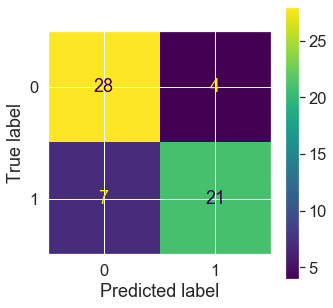

In [42]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



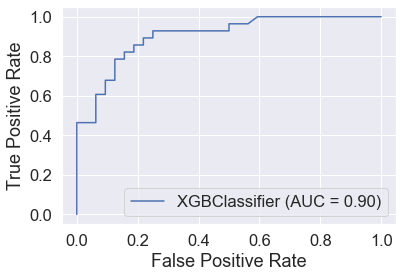

In [44]:
plot_roc_curve(xgbmodel,X_test_scaled,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [45]:
X.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'FBS', 'Thalach', 'ChestPain_2',
       'ChestPain_3', 'ChestPain_4', 'RestECG_1', 'RestECG_2',
       'MajorVessels_1', 'MajorVessels_2', 'MajorVessels_3'],
      dtype='object')

In [46]:
xgbmodel.get_booster().feature_names = ['Age', 'Sex', 'RestBP', 'Chol', 'FBS', 'Thalach', 'ChestPain_2',
       'ChestPain_3', 'ChestPain_4', 'RestECG_1', 'RestECG_2',
       'MajorVessels_1', 'MajorVessels_2', 'MajorVessels_3']

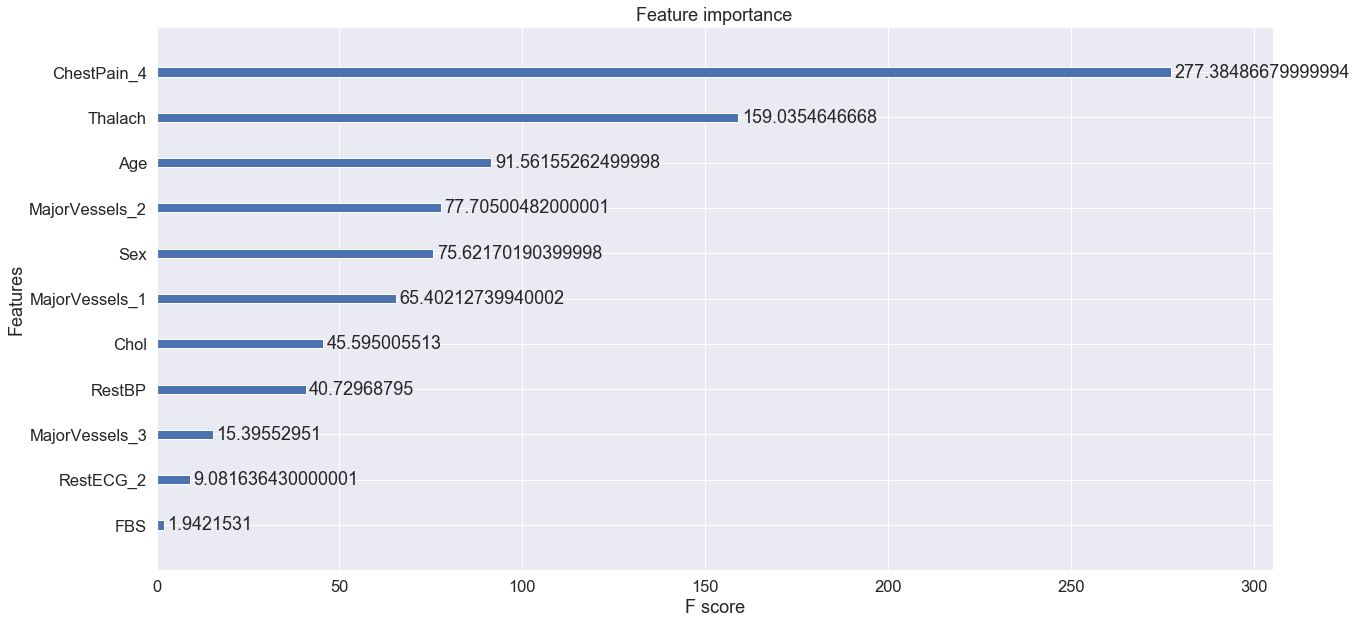

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax, importance_type='total_gain')
plt.show()

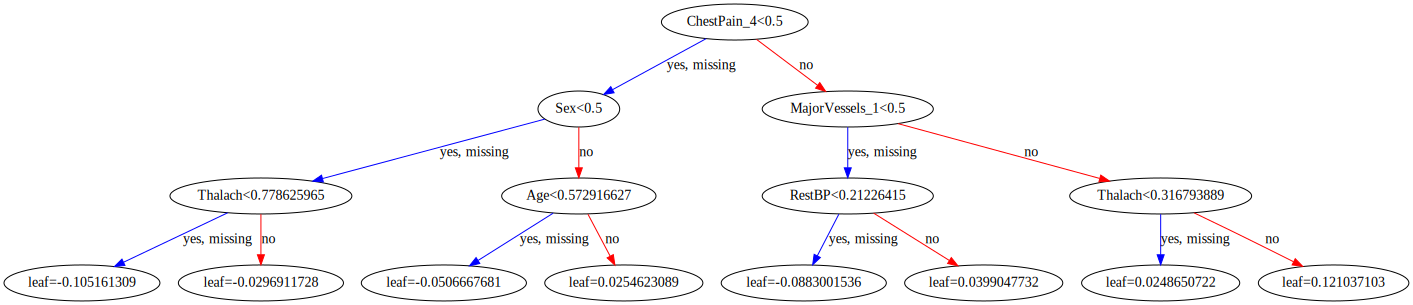

In [48]:
xgb.to_graphviz(xgbmodel,num_trees=10)

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Cross-Validation

In [49]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [50]:
cv.mean()

0.7712429378531074

### Model Tuning

In [51]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [52]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [53]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [54]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [55]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=10,
              learning rate=0.29, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7999999999999999,
              verbosity=1)

In [56]:
randm.best_score_

0.7878531073446329

In [57]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning rate': 0.29,
 'gamma': 10,
 'colsample_bytree': 0.7999999999999999}

### Using GridSearchCV

In [58]:
# model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [59]:
# parameters = {'max_depth': np.arange(3,10,1),
#               'learning rate': np.arange(0.05,0.3,0.03),
#               'n_estimators':np.arange(100,1000,100),
#               'min_child_weight': np.arange(1,4,1),
#               'gamma':np.arange(0,50,2),
#               'subsample':np.arange(0.5,0.9,0.1),
#               'colsample_bytree':np.arange(0.5,0.9,0.1)
#              }

In [60]:
# grids = GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=5,verbose=1,return_train_score=True)

In [61]:
# grids.fit(X,y)

In [62]:
# grids.best_estimator_

### Final Model

In [63]:
xgbnew = XGBClassifier(random_state=0, n_estimators=300, objective='binary:logistic',max_depth=9,
                      gamma=4, min_child_weight=3,learning_rate=0.17,subsample=0.7,colsample_bytree=0.5)

In [64]:
xgbnew.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.316667
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.266667
[2]	validation_0-error:0.2
[3]	validation_0-error:0.25
[4]	validation_0-error:0.25
[5]	validation_0-error:0.266667
[6]	validation_0-error:0.25
[7]	validation_0-error:0.2
[8]	validation_0-error:0.233333
[9]	validation_0-error:0.2
[10]	validation_0-error:0.25
[11]	validation_0-error:0.233333
[12]	validation_0-error:0.233333
[13]	validation_0-error:0.25
[14]	validation_0-error:0.25
[15]	validation_0-error:0.2
[16]	validation_0-error:0.2
[17]	validation_0-error:0.2
[18]	validation_0-error:0.2
[19]	validation_0-error:0.2
[20]	validation_0-error:0.25
[21]	validation_0-error:0.216667
[22]	validation_0-error:0.2
Stopping. Best iteration:
[2]	validation_0-error:0.2



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=4,
              learning_rate=0.17, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [65]:
y_pred = xgbnew.predict(X_test_scaled)

In [66]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

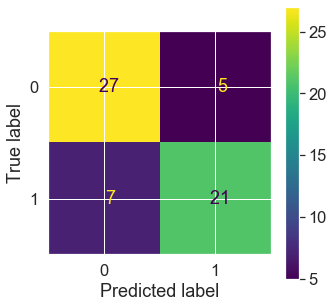

In [67]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbnew,X_test_scaled,y_test,values_format='4g',ax=ax)
plt.show()

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.75      0.78        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



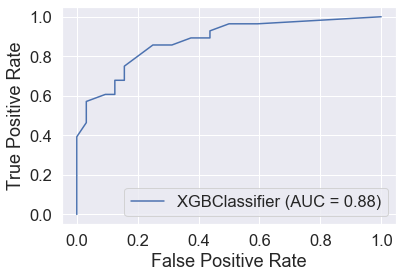

In [69]:
plot_roc_curve(xgbnew,X_test_scaled,y_test)
plt.show()